## Observations and Insights 

1. Out of the four treatment regimens we focused on, only Infubinol has an outlier for final tumor volume. This tumor volume is extremely low compared to the others who had this treatment regimen.

2. Both the Capomulin and Ramicane treatments have a lower final tumor volume average than the other two treatments we looked at - Infubinol and Ceftamin.

3. When looking at one specific mouse in the Capomulin treatment, the tumor volume seems to generally decrease over time.

4. Overall, the weight of the mouse and the average tumor volume seem to be positively correlated. The higher the weight of the mouse, the higher the tumor volume.

In [49]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

#find study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#read mouse data and study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#combine data into a single dataset
data = study_results.merge(mouse_metadata, how="left", on=["Mouse ID"])

#display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
#check the number of mice
data["Mouse ID"].nunique()

249

In [3]:
#get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data.loc[data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
#get all the data for the duplicate mouse ID
data.loc[data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = data[data["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
#check the number of mice in the clean DataFrame
clean_data["Mouse ID"].nunique()

248

In [7]:
#generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen
regimens = clean_data.groupby("Drug Regimen")
tv_mean = regimens[["Tumor Volume (mm3)"]].mean()
tv_med = regimens[["Tumor Volume (mm3)"]].median()
tv_var = regimens[["Tumor Volume (mm3)"]].var()
tv_std = regimens[["Tumor Volume (mm3)"]].std()
tv_sem = regimens[["Tumor Volume (mm3)"]].sem()
sum_tv = tv_mean.merge(tv_med, how="left", on=["Drug Regimen"], suffixes=("_mean", "_med"))
sum_tv = sum_tv.merge(tv_var, how="left", on=["Drug Regimen"], suffixes=(None, "_var"))
sum_tv = sum_tv.merge(tv_std, how="left", on=["Drug Regimen"], suffixes=(None, "_std"))
sum_tv = sum_tv.merge(tv_sem, how="left", on=["Drug Regimen"], suffixes=(None, "_sem"))
sum_tv = sum_tv.rename(columns={"Tumor Volume (mm3)_mean":"Mean Tumor Volume",
                                "Tumor Volume (mm3)_med":"Median Tumor Volume",
                                "Tumor Volume (mm3)":"Tumor Volume Variance",
                                "Tumor Volume (mm3)_std":"Tumor Volume Std. Dev.",
                                "Tumor Volume (mm3)_sem":"Tumor Volume Std. Err."})
sum_tv

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice for Each Treatment')

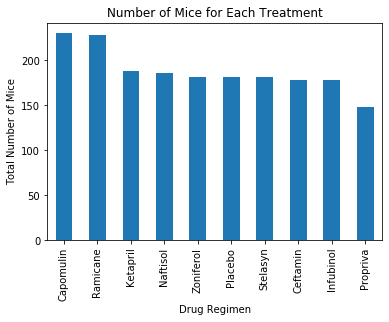

In [54]:
#generate a bar plot showing total number of mice for each treatment throughout the course of the study using pandas 
tv_counts = regimens[["Tumor Volume (mm3)"]].count()
tv_counts = tv_counts.sort_values("Tumor Volume (mm3)", ascending=False)
tv_bar = tv_counts.plot(kind="bar", legend=None)
tv_bar.set_ylabel("Total Number of Mice")
tv_bar.set_title("Number of Mice for Each Treatment")

Text(0, 0.5, 'Total Number of Mice')

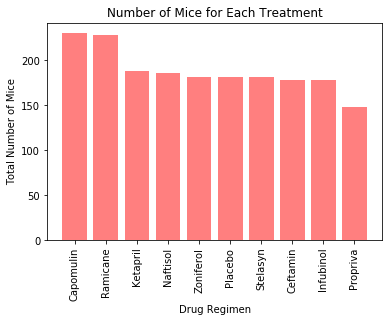

In [55]:
#generate a bar plot showing total number of mice for each treatment throughout the course of the study using pyplot
tv_counts = tv_counts.reset_index()
plt.bar(tv_counts["Drug Regimen"], tv_counts["Tumor Volume (mm3)"], color='r', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")

Text(0.5, 1.0, 'Distribution of Male and Female Mice')

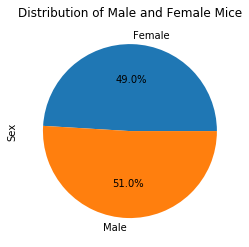

In [56]:
#generate a pie plot showing the distribution of female versus male mice using pandas
sex = clean_data.groupby("Sex")
sex_count = sex[["Mouse ID"]].count()
sex_pie = sex_count.plot(kind="pie", y="Mouse ID", legend=None, autopct='%1.1f%%')
sex_pie.set_ylabel("Sex")
sex_pie.set_title("Distribution of Male and Female Mice")

Text(0.5, 1.0, 'Distribution of Male and Female Mice')

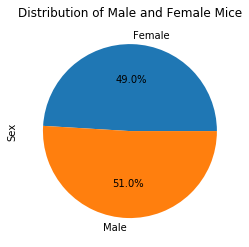

In [57]:
#generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = sex_count.reset_index()
plt.pie(sex_count["Mouse ID"], labels=sex_count["Sex"], autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Distribution of Male and Female Mice")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#get the last (greatest) timepoint for each mouse
tumor_max = clean_data.groupby("Mouse ID").max().reset_index()

#merge above df with the original dataframe to get the tumor volume at the last timepoint
merge_df = tumor_max[["Mouse ID", "Timepoint"]].merge(clean_data, how="left", on=["Mouse ID", "Timepoint"])
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:
#put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    #locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = merge_df.loc[merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    #add subset 
    tumor_vol_data.append(final_tumor)
    
    #determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bd = lowerq - (1.5*iqr)
    upper_bd = upperq + (1.5*iqr)
    outliers = final_tumor.loc[(final_tumor < lower_bd) | 
                               (final_tumor > upper_bd)]
    print(f"{drug}'s potential outliers are {outliers}")

Capomulin's potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Final Tumor Volume per Regimen')

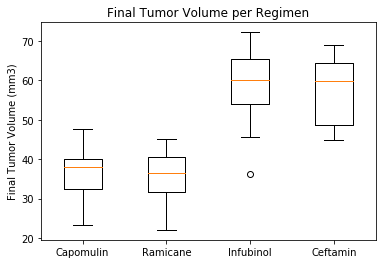

In [58]:
#generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data)
plt.xticks([1, 2, 3, 4], treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume per Regimen")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

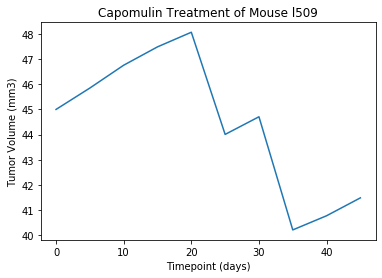

In [15]:
#generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
mouse_df = cap_df.loc[cap_df["Mouse ID"] == "l509"]
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor Volume (mm3)')

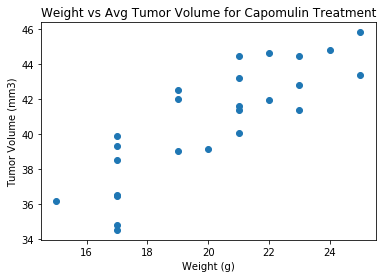

In [47]:
#generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mi = cap_df.groupby("Mouse ID")
avg_tv = cap_df.groupby("Mouse ID").mean().reset_index()
plt.scatter(avg_tv["Weight (g)"], avg_tv["Tumor Volume (mm3)"])
plt.title("Weight vs Avg Tumor Volume for Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


Text(0, 0.5, 'Tumor Volume (mm3)')

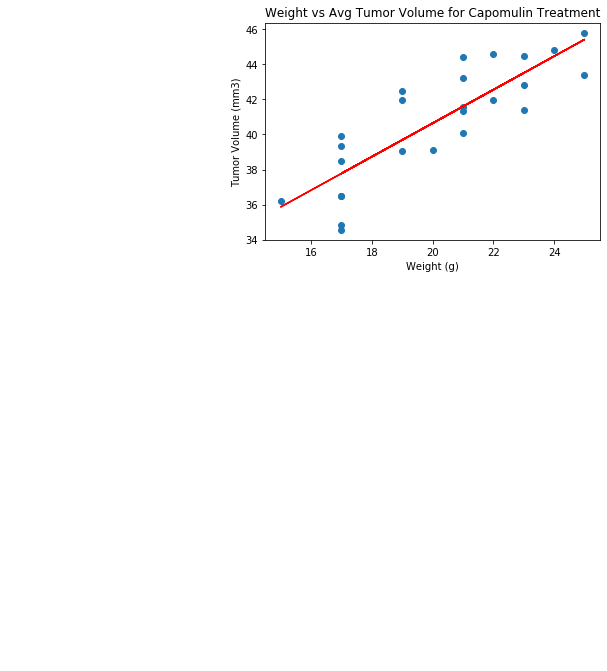

In [53]:
#calculate correlation coefficient and linear regression model for mouse weight and average tumor volume 
#for the Capomulin regimen
x_values = avg_tv["Weight (g)"]
y_values = avg_tv["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
#calculate the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#create scatterplot and plot regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Weight vs Avg Tumor Volume for Capomulin Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")